In [74]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
with open("proteinInfo.json","r") as f:
    info = json.load(f)

In [63]:
def singleFactor(key):
    return [float(info[x][key]) for x in info.keys()]

def distribution(data,title,color):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.distplot(data,axlabel=title,ax=ax,color=color)

def singleKeyPlot(key,color):
    data = singleFactor(key)
    print(f"Max value is {max(data)}")
    distribution(data,key,color)

def doubleKeyPlot(key,color):
    data = singleFactor(key+"1") + singleFactor(key+"2")
    print(f"Max value is {max(data)}")
    distribution(data,key,color)

Max value is 1377.0


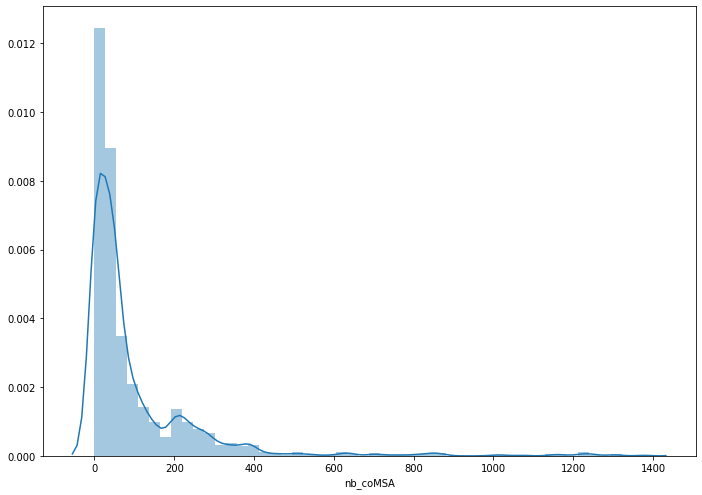

In [31]:
singleKeyPlot("nb_coMSA")

Max value is 33.054


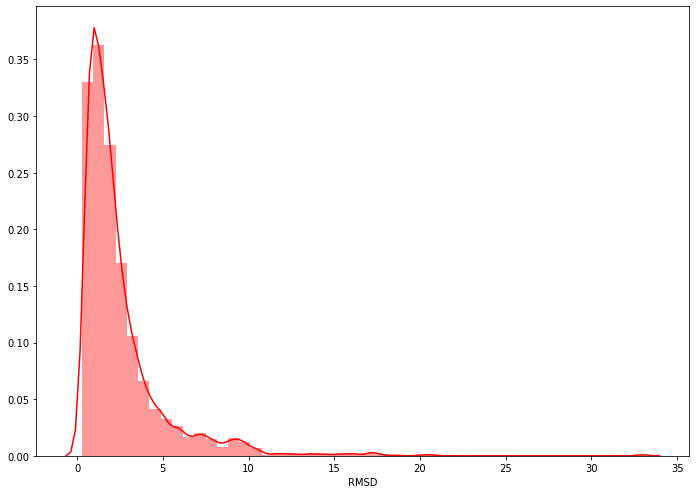

In [64]:
doubleKeyPlot("RMSD",'r')

Max value is 1705.0


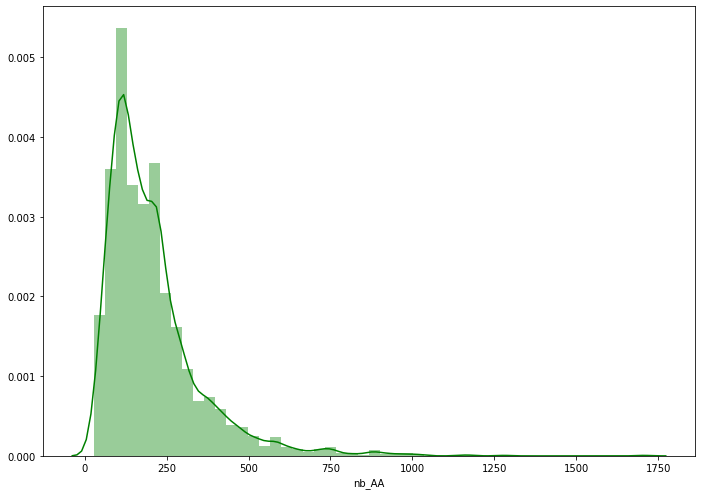

In [65]:
doubleKeyPlot("nb_AA",'g')

Max value is 3.25


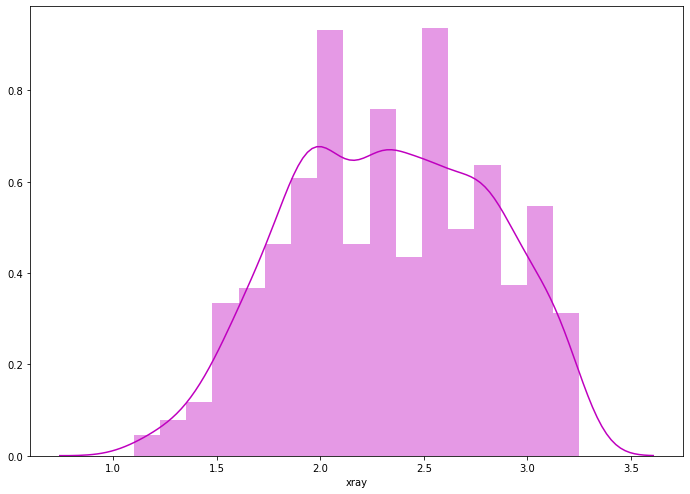

In [68]:
singleKeyPlot("xray",'m')

Max value is 1351250


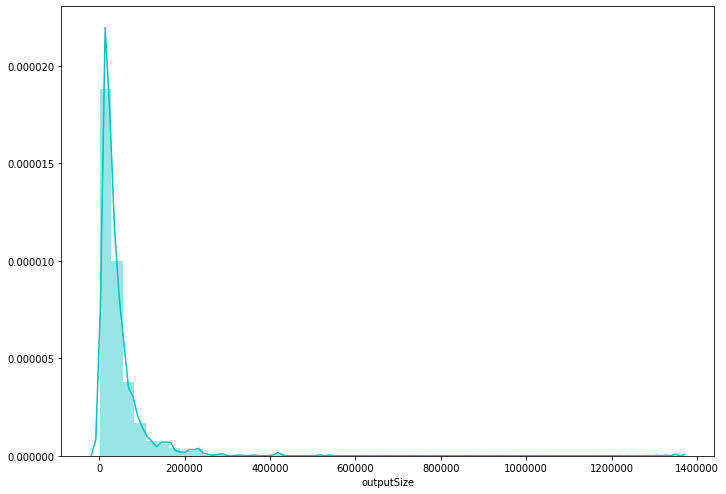

In [69]:
combinedAAs = [int(info[x]["nb_AA1"])*int(info[x]["nb_AA2"]) for x in info.keys()]
print(f"Max value is {max(combinedAAs)}")
distribution(combinedAAs,"outputSize",'c')

In [81]:
len([x for x in combinedAAs if x < 150000])/len(combinedAAs)

0.9541284403669725

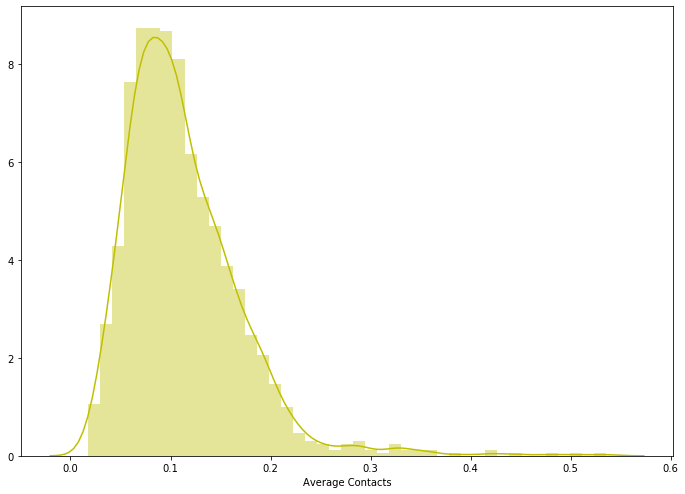

In [73]:
averageContacts = [int(info[x]["res_contact_per_ch"])/((int(info[x]["nb_AA1"]) + int(info[x]["nb_AA2"]))/2) for x in info.keys()]
distribution(averageContacts,"Average Contacts",'y')

In [53]:
difficulties = [info[x]["category"]for x in info.keys()]

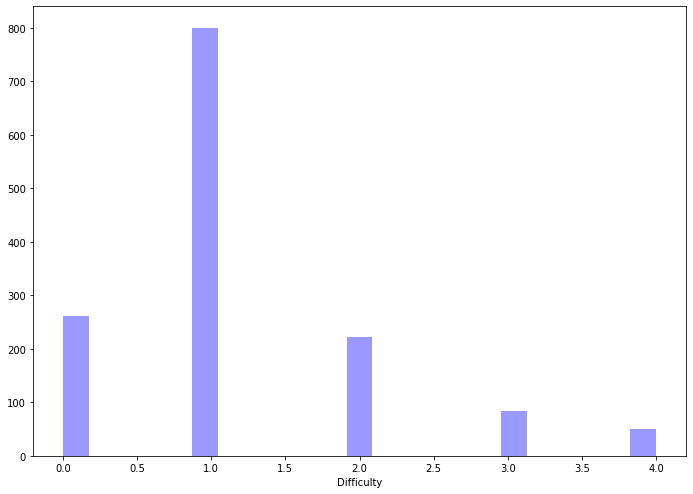

In [71]:
diffMap = {
    'very_easy' : 0,
    'easy' : 1,
    'hard' : 2,
    'very_hard' : 3,
    'super_hard' : 4
}
diffInts = [diffMap[x] for x in difficulties]
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(diffInts,axlabel="Difficulty",ax=ax,kde=False,color='b')

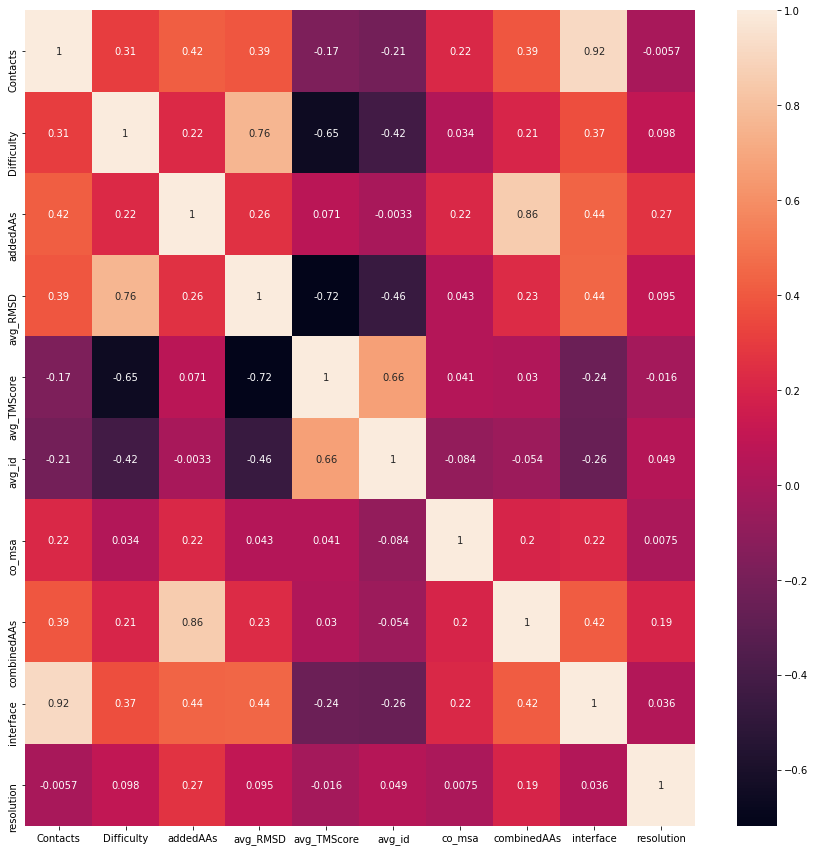

In [78]:
#plot correlation matrix
df = pd.DataFrame()
for i,x in enumerate(info.keys()):
    row={}
    row["combinedAAs"] = float(info[x]["nb_AA1"]) * float(info[x]["nb_AA2"])
    row["addedAAs"] = float(info[x]["nb_AA1"]) + float(info[x]["nb_AA2"])
    row["Difficulty"] = float(diffInts[i])
    row["co_msa"] = float(info[x]["nb_coMSA"])
    row["resolution"] = float(info[x]["xray"])
    row["Contacts"] = float(info[x]["res_contact_per_ch"])
    row["avg_id"] = (float(info[x]["id1"]) + float(info[x]["id2"]))/2
    row["avg_TMScore"] = (float(info[x]["TMscore1"]) + float(info[x]["TMscore2"]))/2
    row["avg_RMSD"] = (float(info[x]["RMSD1"]) + float(info[x]["RMSD2"]))/2
    row["interface"] = float(info[x]["area"])
    df = df.append(row,ignore_index=True)
corrMatrix = df.corr()
a_dims = (15, 15)
fig, ax = plt.subplots(figsize=a_dims)
sns.heatmap(corrMatrix, annot=True,ax=ax)